In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Data load

In [3]:
#data=pd.read_table('datos.txt')

In [4]:
data=pd.read_csv("datos/datos3.csv")
data=data.rename(columns={'Unnamed: 0':'No'})
data=data.drop('No',axis=1)

In [5]:
data

,X,Y,RV,I
0,144.83,19.6,-248.768878,73.97
1,143.49,19.6,-249.728170,94.17
2,142.15,19.6,-252.788768,101.40
3,140.81,19.6,-260.371743,118.20
4,139.46,19.6,-270.284427,180.00
...,...,...,...,...
595,71.07,0.0,-223.644563,471.50
596,69.73,0.0,-223.827285,631.80
597,68.39,0.0,-223.827285,729.80
598,67.05,0.0,-224.740897,339.00


Bidimensional Data Display

(61.75399999999999, 148.786, -0.9800000000000001, 20.580000000000002)

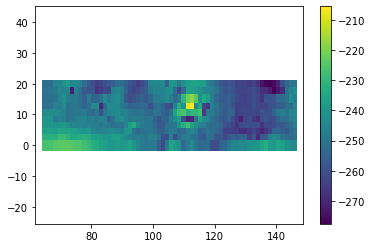

In [6]:
plt.scatter(data.X,data.Y,c=data.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

Second order Structure Function of a weighted property:
$$S_{2}W_{II}(l)=\langle {\vert \overrightarrow{w}(\overrightarrow{x}+\overrightarrow{l})-\overrightarrow{w}(\overrightarrow{x}) \vert}^{2}$$ 


Data Rearrange

In [7]:
argo=(data.I*data.RV)/data.I.sum()
dataw= pd.DataFrame({'X': data.X, 'Y': data.Y, 'RV': argo})
data=dataw

In [8]:
df1=abs(data)
df1n=df1.to_numpy()

xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))

Structure Function code

In [9]:
sig2=2*(data.RV.var())#Change to header third column
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [10]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]

In [11]:
#Second Order Structure Function Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(((f[j][0])-(f[i][0]))**2)

#Normalized Second Order Structure Function Matrix [LxL]
#for i in range(l):
#    for j in range(l):
#        if i > j:
#            a[i][j]=(((f[j][0]-fm)-(f[i][0]-fm))**2)/(fv)       

In [12]:
#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5 

In [13]:
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]

In [14]:
#pd.DataFrame(a)

In [15]:
#pd.DataFrame(b)

In [16]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,1])>0.0
e=d[ind]

df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,179700.000000,1.797000e+05
mean,28.993103,9.528159e-01
std,17.837259,3.152851e+00
min,1.340000,1.014951e-11
25%,14.667409,8.341752e-03
50%,25.446611,6.496659e-02
75%,41.359556,4.393670e-01
max,81.511560,3.290727e+01


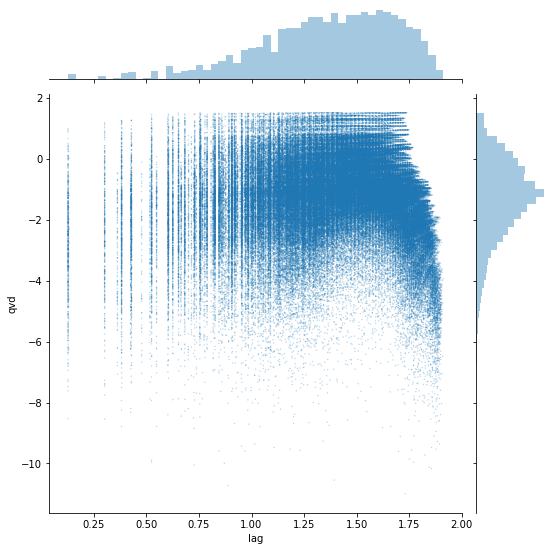

In [17]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.3, s=2, edgecolor='none')
ax.fig.set_size_inches(8,8)

Structure Function Data Groups

In [18]:
m=1.341#separation between lags mib valu=min lag

In [19]:
n=int(df.lag.max())//m#Number of points

In [20]:
#Grouping points
dfx=dict()

for i in range(int(n)):
    p=0+i*m
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]

In [21]:
dfx

{0:          lag       qvd
 0       1.34  0.000014
 599     1.34  0.000002
 1197    1.34  0.000014
 2390    1.34  0.000761
 2985    1.34  0.000001
 ...      ...       ...
 179685  1.34  0.000033
 179690  1.34  0.000693
 179694  1.34  0.000258
 179697  1.34  0.004069
 179699  1.34  0.000995
 
 [530 rows x 2 columns],
 1:              lag           qvd
 1       2.680000  2.801035e-05
 59      2.300000  2.314764e-05
 60      2.661879  7.582810e-07
 600     2.680000  2.822528e-05
 657     2.661879  7.318990e-05
 ...          ...           ...
 179679  1.350000  7.511395e-04
 179686  2.680000  1.027668e-03
 179691  2.680000  1.795760e-03
 179695  2.680000  2.278945e-03
 179698  2.680000  9.089767e-03
 
 [1944 rows x 2 columns],
 2:              lag           qvd
 2       4.020000  8.202304e-05
 61      3.531629  1.637461e-09
 660     3.531629  6.097270e-07
 1198    2.690000  2.838121e-04
 1254    3.531629  1.020843e-04
 ...          ...           ...
 179673  2.690000  4.129948e-03
 179680 

In [22]:
len(dfx)

60

Main Matrix Statistical Properties Groups

In [23]:
lgp=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

In [24]:
n=len(dfx)

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    if dl[i]>0:
        dery[i]=dfs[i]/np.sqrt(dl[i])
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    if dl[i]>0:
        derx[i]=dls[i]/np.sqrt(dl[i])  


In [25]:
g=[[0]*(7) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=dl[i]
    g[i][6]=derx[i]

In [26]:
sf=pd.DataFrame(g)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','# P','ErrX']
sf.describe()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,6.000000e+01
mean,40.885989,0.707992,0.037307,2.229224,7.297250e+00,2997.800000,9.142868e-03
std,23.401836,0.519448,0.025663,1.538591,5.528719e+00,1845.215956,5.098761e-03
min,1.340000,0.000096,0.000031,0.000328,1.076334e-07,112.000000,5.814346e-16
25%,21.115000,0.048298,0.002095,0.083914,7.065115e-03,1477.500000,6.422574e-03
50%,40.900000,0.871031,0.044044,3.116563,9.713091e+00,2806.000000,7.768646e-03
75%,60.675000,1.149807,0.056654,3.465117,1.200704e+01,4393.500000,1.004851e-02
max,80.280349,1.410356,0.073279,3.912157,1.530497e+01,6500.000000,3.248088e-02


In [27]:
sf

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
0,1.340000,0.171833,0.037160,0.855487,7.318580e-01,530,5.814346e-16
1,2.680000,0.391513,0.038736,1.707880,2.916855e+00,1944,6.846354e-03
2,4.022735,0.561357,0.051870,2.324344,5.402577e+00,2008,8.778332e-03
3,5.360000,0.705091,0.047314,2.698132,7.279919e+00,3252,6.988104e-03
4,6.700000,0.833102,0.045020,3.022050,9.132787e+00,4506,6.491595e-03
5,8.045471,0.827345,0.046525,2.951286,8.710090e+00,4024,6.536837e-03
6,9.380000,0.867264,0.042861,3.075292,9.457420e+00,5148,5.881196e-03
7,10.720000,0.874799,0.039560,2.964084,8.785796e+00,5614,5.045729e-03
8,12.068206,0.906677,0.039815,3.072728,9.441660e+00,5956,5.239566e-03
9,13.410000,0.920237,0.038719,3.105294,9.642850e+00,6432,5.688001e-03


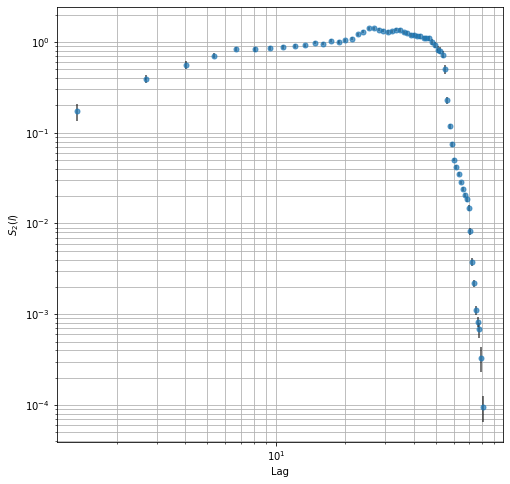

In [28]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=5)
ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

In [29]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.639169692993164 seconds ---
